In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [54]:
file_path = "C:\\Users\\Dell\\Desktop\\WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(file_path)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [55]:
data.shape

(1470, 35)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [57]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [58]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [59]:
pd.set_option('display.max_columns', None)


In [60]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


##### There is no NULL value present in any column. Most columns have int64 data type, but some columns have object data type, So we encode it.

In [61]:
for column in data.columns:
    unique_count = data[column].nunique()
    print("Column:", column,'====', unique_count)

Column: Age ==== 43
Column: Attrition ==== 2
Column: BusinessTravel ==== 3
Column: DailyRate ==== 886
Column: Department ==== 3
Column: DistanceFromHome ==== 29
Column: Education ==== 5
Column: EducationField ==== 6
Column: EmployeeCount ==== 1
Column: EmployeeNumber ==== 1470
Column: EnvironmentSatisfaction ==== 4
Column: Gender ==== 2
Column: HourlyRate ==== 71
Column: JobInvolvement ==== 4
Column: JobLevel ==== 5
Column: JobRole ==== 9
Column: JobSatisfaction ==== 4
Column: MaritalStatus ==== 3
Column: MonthlyIncome ==== 1349
Column: MonthlyRate ==== 1427
Column: NumCompaniesWorked ==== 10
Column: Over18 ==== 1
Column: OverTime ==== 2
Column: PercentSalaryHike ==== 15
Column: PerformanceRating ==== 2
Column: RelationshipSatisfaction ==== 4
Column: StandardHours ==== 1
Column: StockOptionLevel ==== 4
Column: TotalWorkingYears ==== 40
Column: TrainingTimesLastYear ==== 7
Column: WorkLifeBalance ==== 4
Column: YearsAtCompany ==== 37
Column: YearsInCurrentRole ==== 19
Column: YearsSince

In [62]:
from sklearn.preprocessing import OrdinalEncoder
enc_columns = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
encoder = OrdinalEncoder()

for column in enc_columns:
    data[column] = encoder.fit_transform(data[[column]])
    
data.head

<bound method NDFrame.head of       Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41        1.0             2.0       1102         2.0                 1   
1      49        0.0             1.0        279         1.0                 8   
2      37        1.0             2.0       1373         1.0                 2   
3      33        0.0             1.0       1392         1.0                 3   
4      27        0.0             2.0        591         1.0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36        0.0             1.0        884         1.0                23   
1466   39        0.0             2.0        613         1.0                 6   
1467   27        0.0             2.0        155         1.0                 4   
1468   49        0.0             1.0       1023         2.0                 2   
1469   34        0.0             2.0        628         1.0                 8  

In [63]:
data.dtypes

Age                           int64
Attrition                   float64
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                      float64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

###### The data in most of the columns is categorical type.  Only the data type of daily rate, employee number, monthly income, monthly rate is continuous.

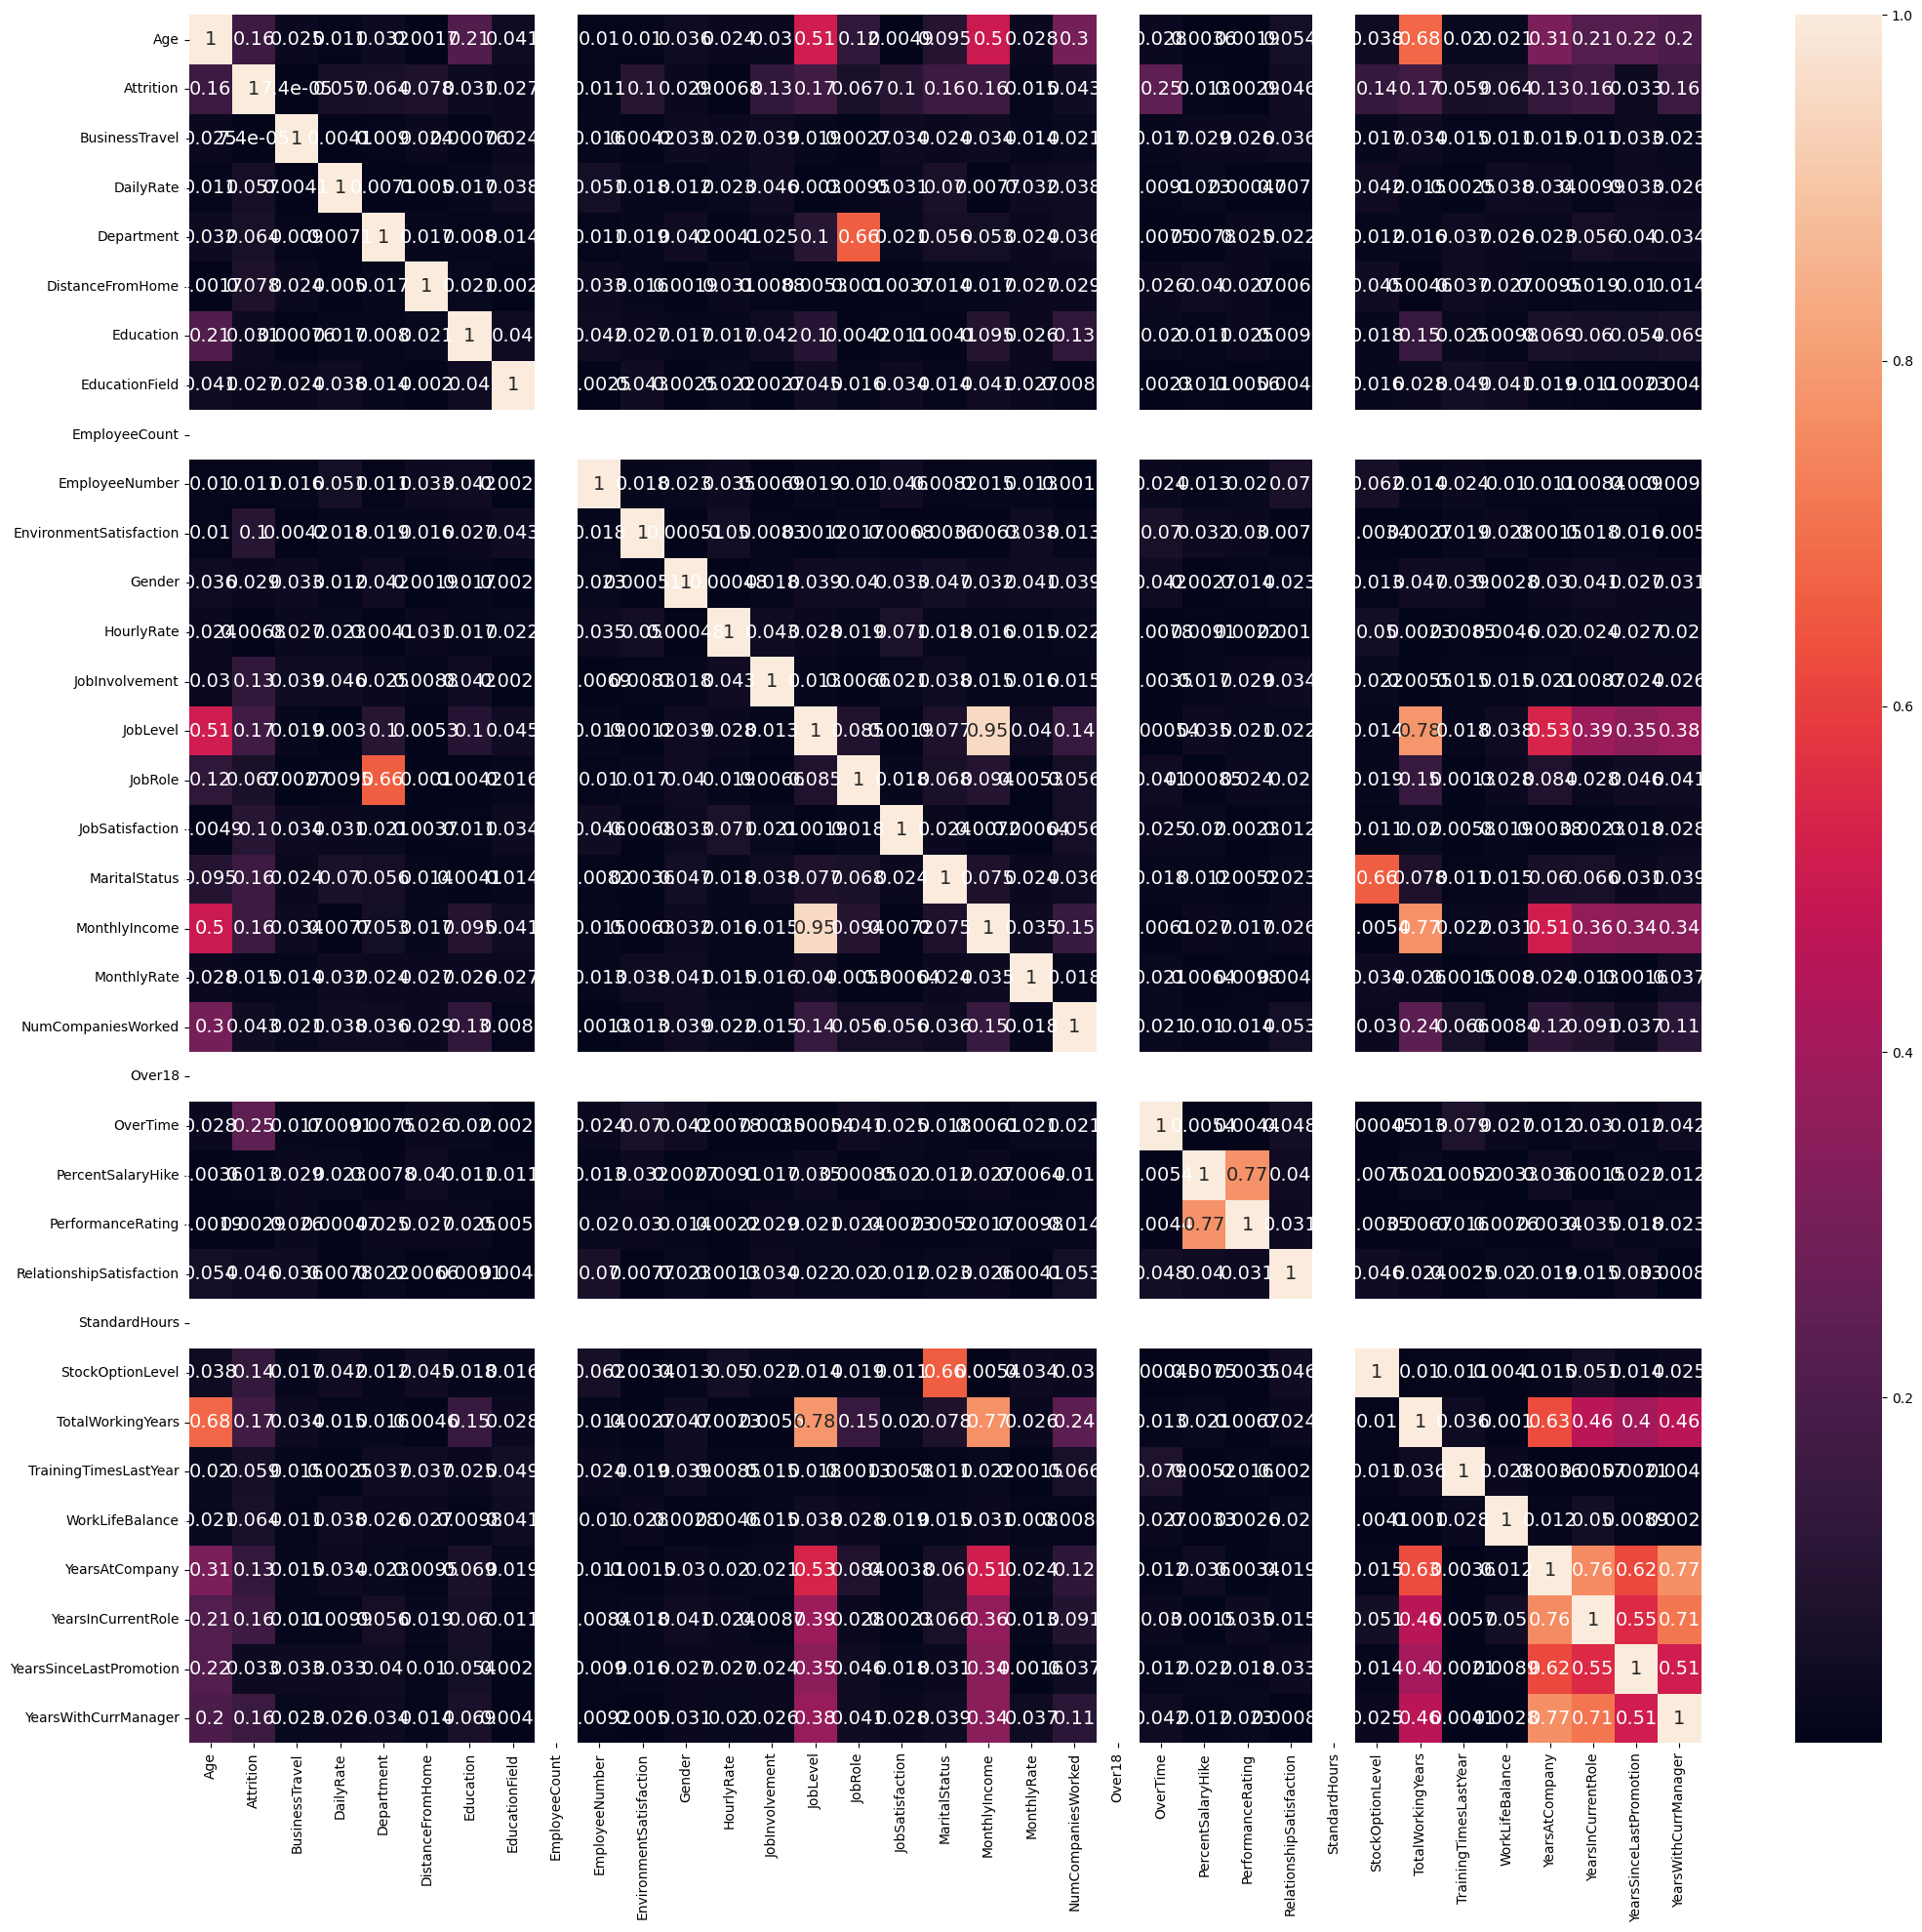

In [64]:
plt.figure(figsize=(25,23))
sns.heatmap(data.corr().abs(), annot=True, annot_kws={"size": 14})

plt.show()


###### I will delete EmployeeCount, Over18, StandardHours columns as it is not useful for our prediction.

In [65]:
data = data.drop(columns=['EmployeeCount','Over18','StandardHours'])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,2,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,5,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,7,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


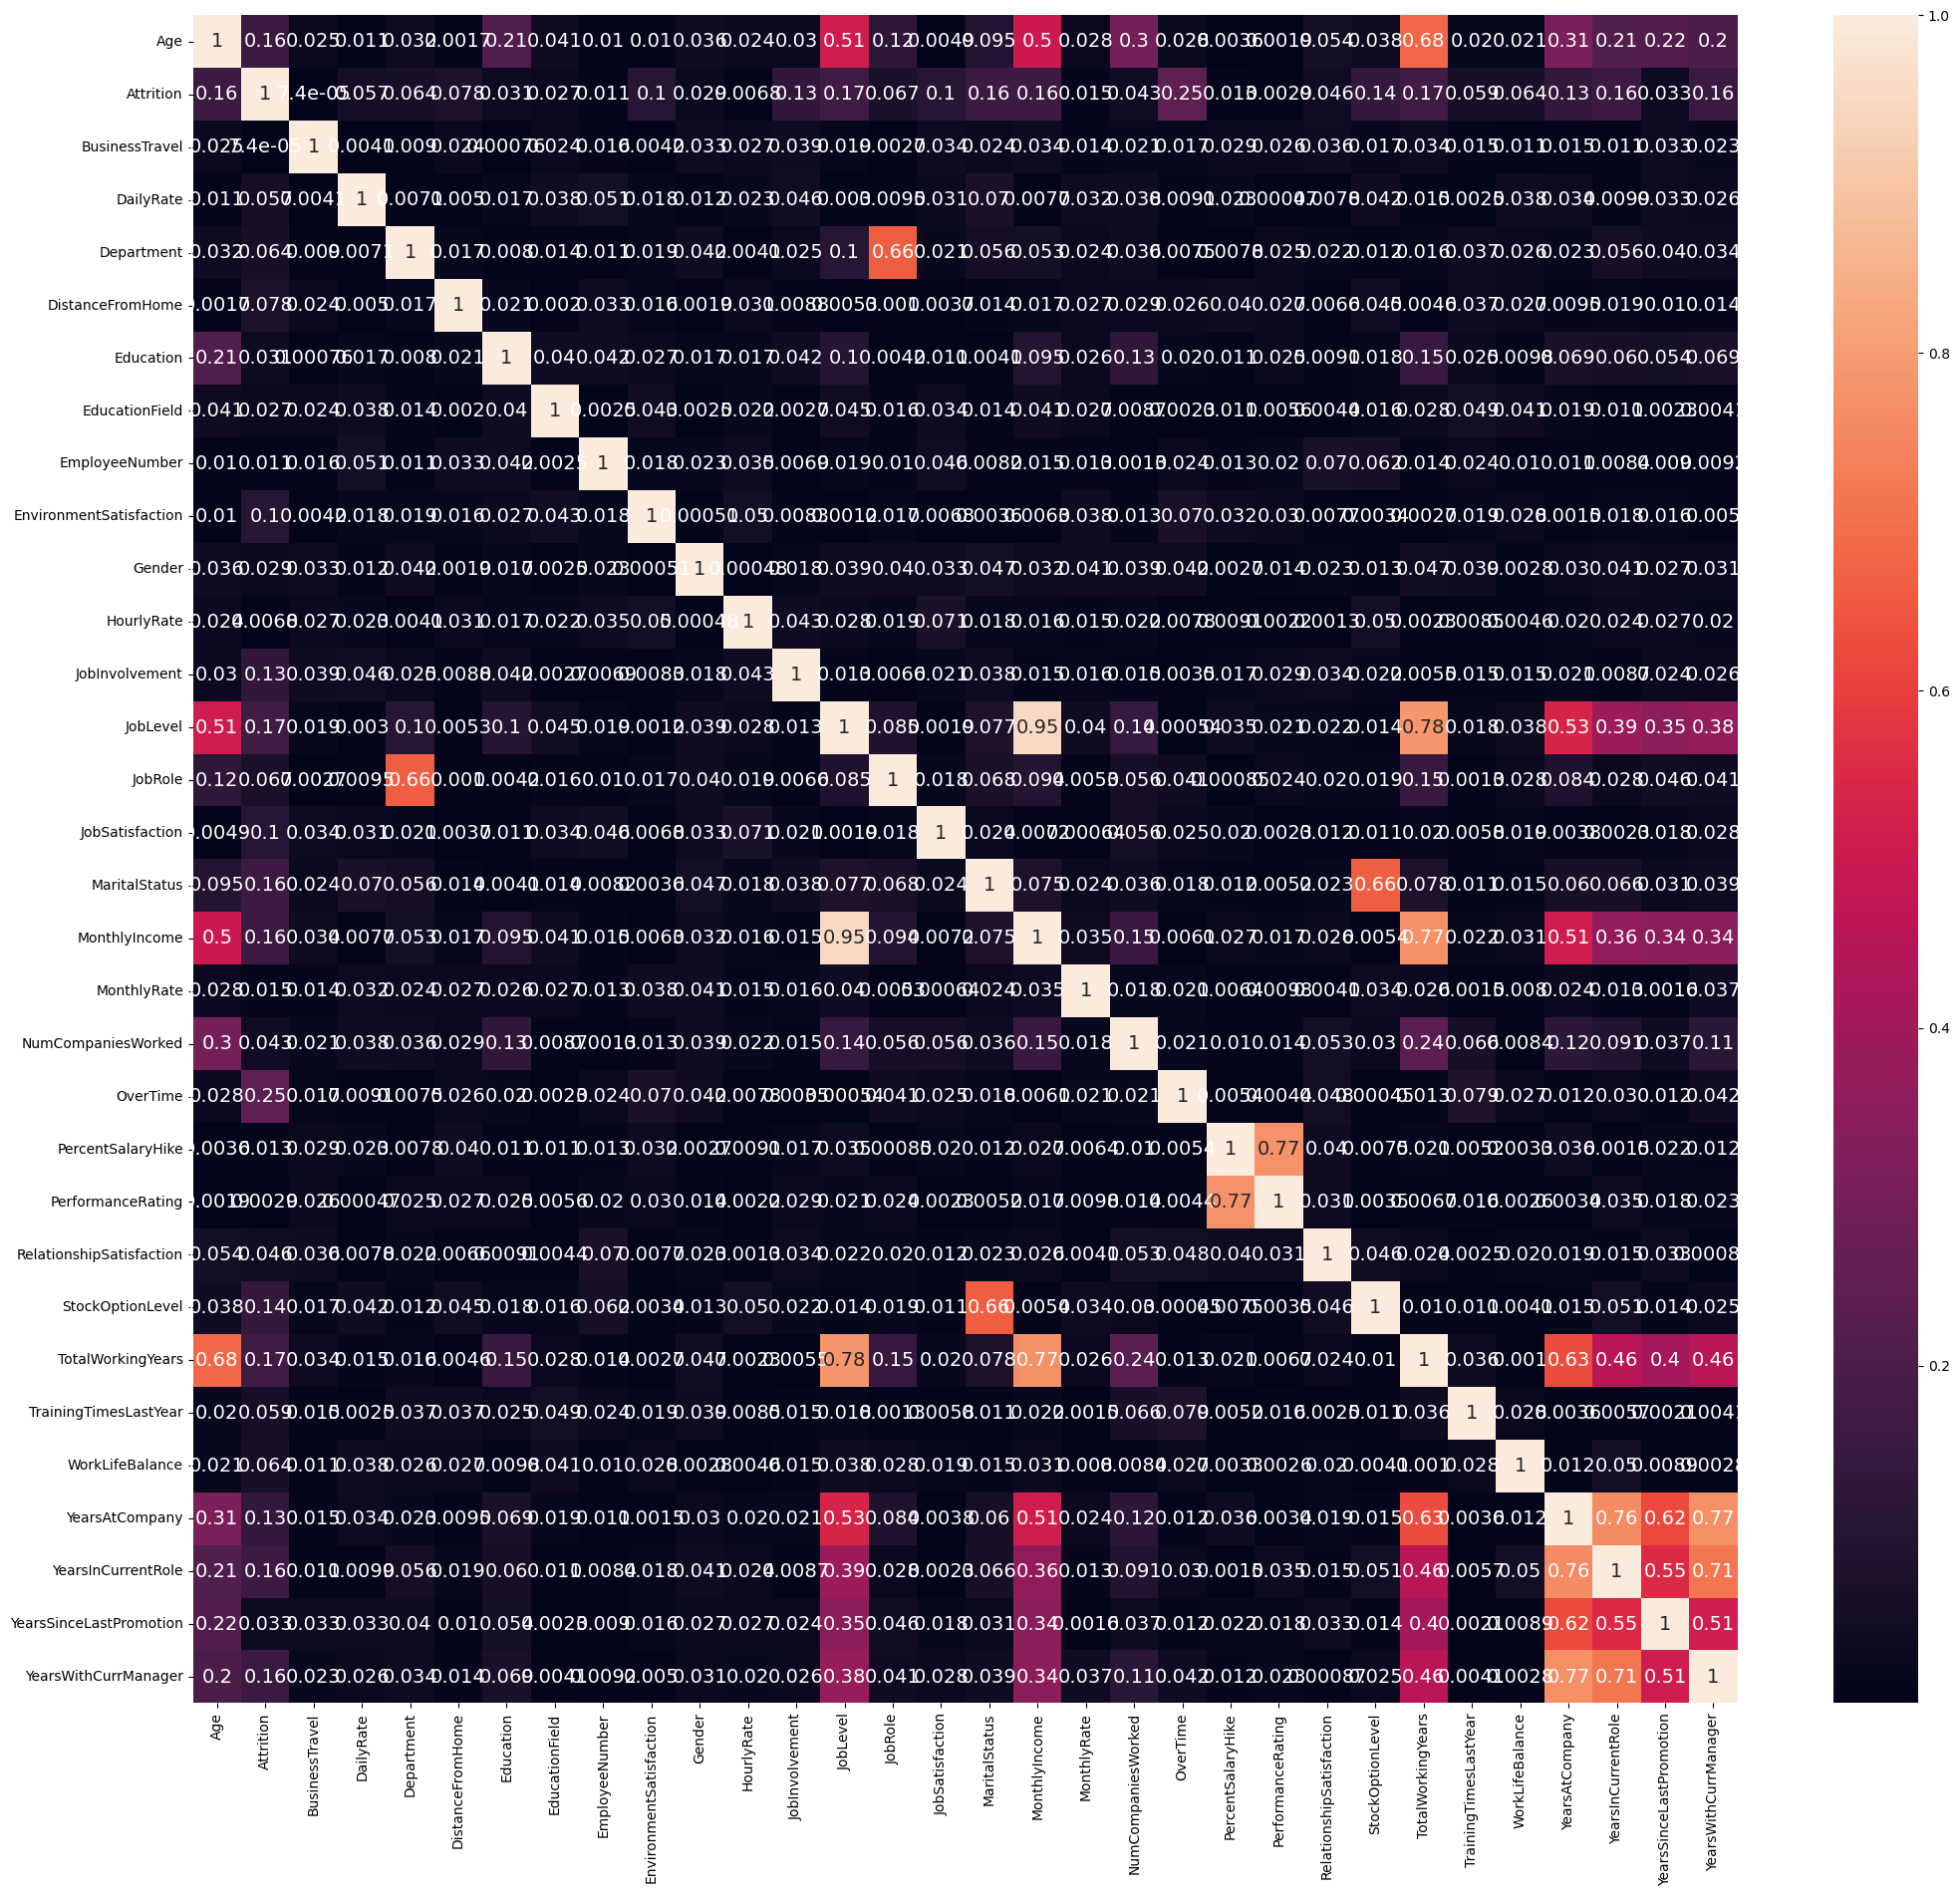

In [66]:
plt.figure(figsize=(25,22))
sns.heatmap(data.corr().abs(), annot=True, annot_kws={"size": 14})

plt.show()


##### There is multicollinearity in job level and monthly income.  also job level and TotalWorkingYears, also monthly income and TotalWorkingYears. also YearsInCurrentRole and YearsAtCompany , also YearsSinceLastPromotion and  YearsAtCompany, also YearsWithCurrManager and YearsAtCompany. also YearsInCurrentRole  and YearsWithCurrManager.

In [67]:
data = data.drop(columns=['JobLevel','TotalWorkingYears','YearsAtCompany','YearsWithCurrManager'])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,2,0.0,94,3,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,0,1,4,0
1,49,0.0,1.0,279,1.0,8,1,1.0,2,3,1.0,61,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,3,3,7,1
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,4,1.0,92,2,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,3,3,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,5,4,0.0,56,3,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,3,3,7,3
4,27,0.0,2.0,591,1.0,2,1,3.0,7,1,1.0,40,3,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,3,3,2,2


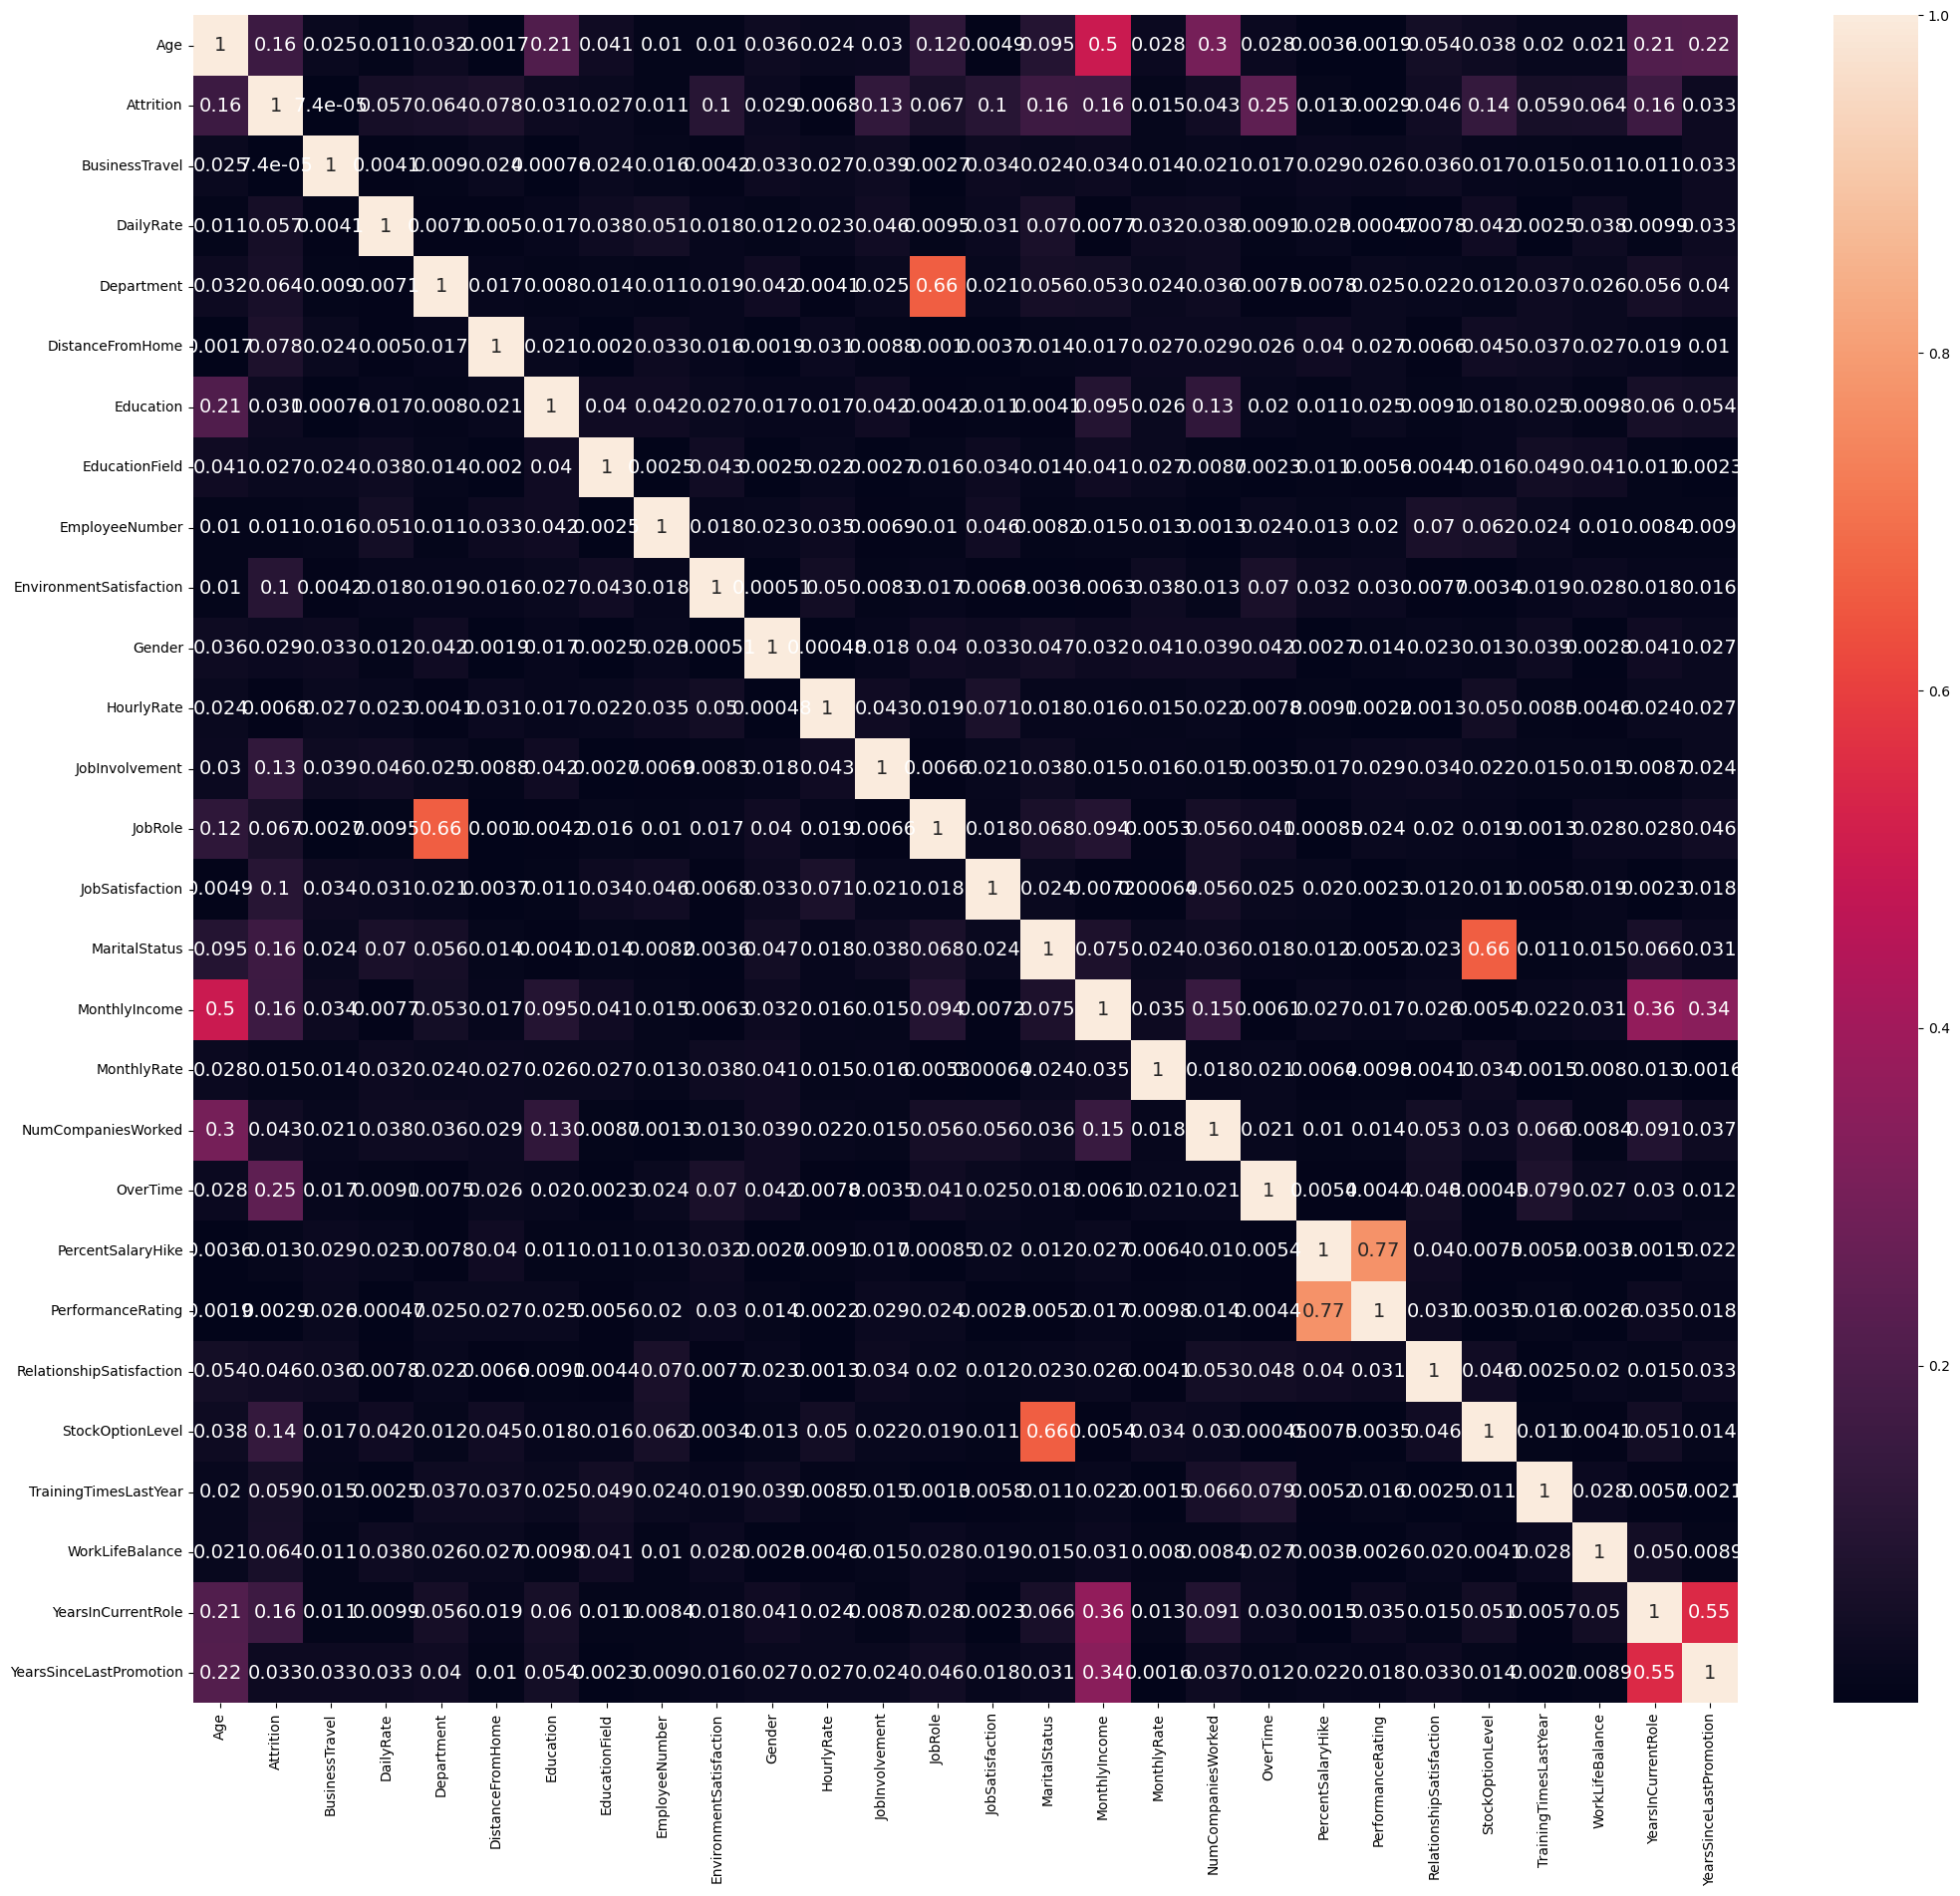

In [68]:
plt.figure(figsize=(25,22))
sns.heatmap(data.corr().abs(), annot=True, annot_kws={"size": 14})

plt.show()


 ##### PercentSalaryHike and PerformanceRating also have YearsWithCurrManager

In [69]:
data = data.drop(columns=['PerformanceRating'])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,2,0.0,94,3,7.0,4,2.0,5993,19479,8,1.0,11,1,0,0,1,4,0
1,49,0.0,1.0,279,1.0,8,1,1.0,2,3,1.0,61,2,6.0,2,1.0,5130,24907,1,0.0,23,4,1,3,3,7,1
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,4,1.0,92,2,2.0,3,2.0,2090,2396,6,1.0,15,2,0,3,3,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,5,4,0.0,56,3,6.0,3,1.0,2909,23159,1,1.0,11,3,0,3,3,7,3
4,27,0.0,2.0,591,1.0,2,1,3.0,7,1,1.0,40,3,2.0,2,1.0,3468,16632,9,0.0,12,4,1,3,3,2,2


In [70]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,0.600000,65.891156,2.729932,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.282993,15.209524,2.712245,0.793878,2.799320,2.761224,4.229252,2.187755
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,0.490065,20.329428,0.711561,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,1.081209,0.852077,1.289271,0.706476,3.623137,3.222430
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,30.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,0.000000,48.000000,2.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,2.000000,0.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,1.000000,66.000000,3.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,4.000000,1.000000,3.000000,3.000000,7.000000,3.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,3.000000,6.000000,4.000000,18.000000,15.000000


In [71]:
data.shape

(1470, 27)

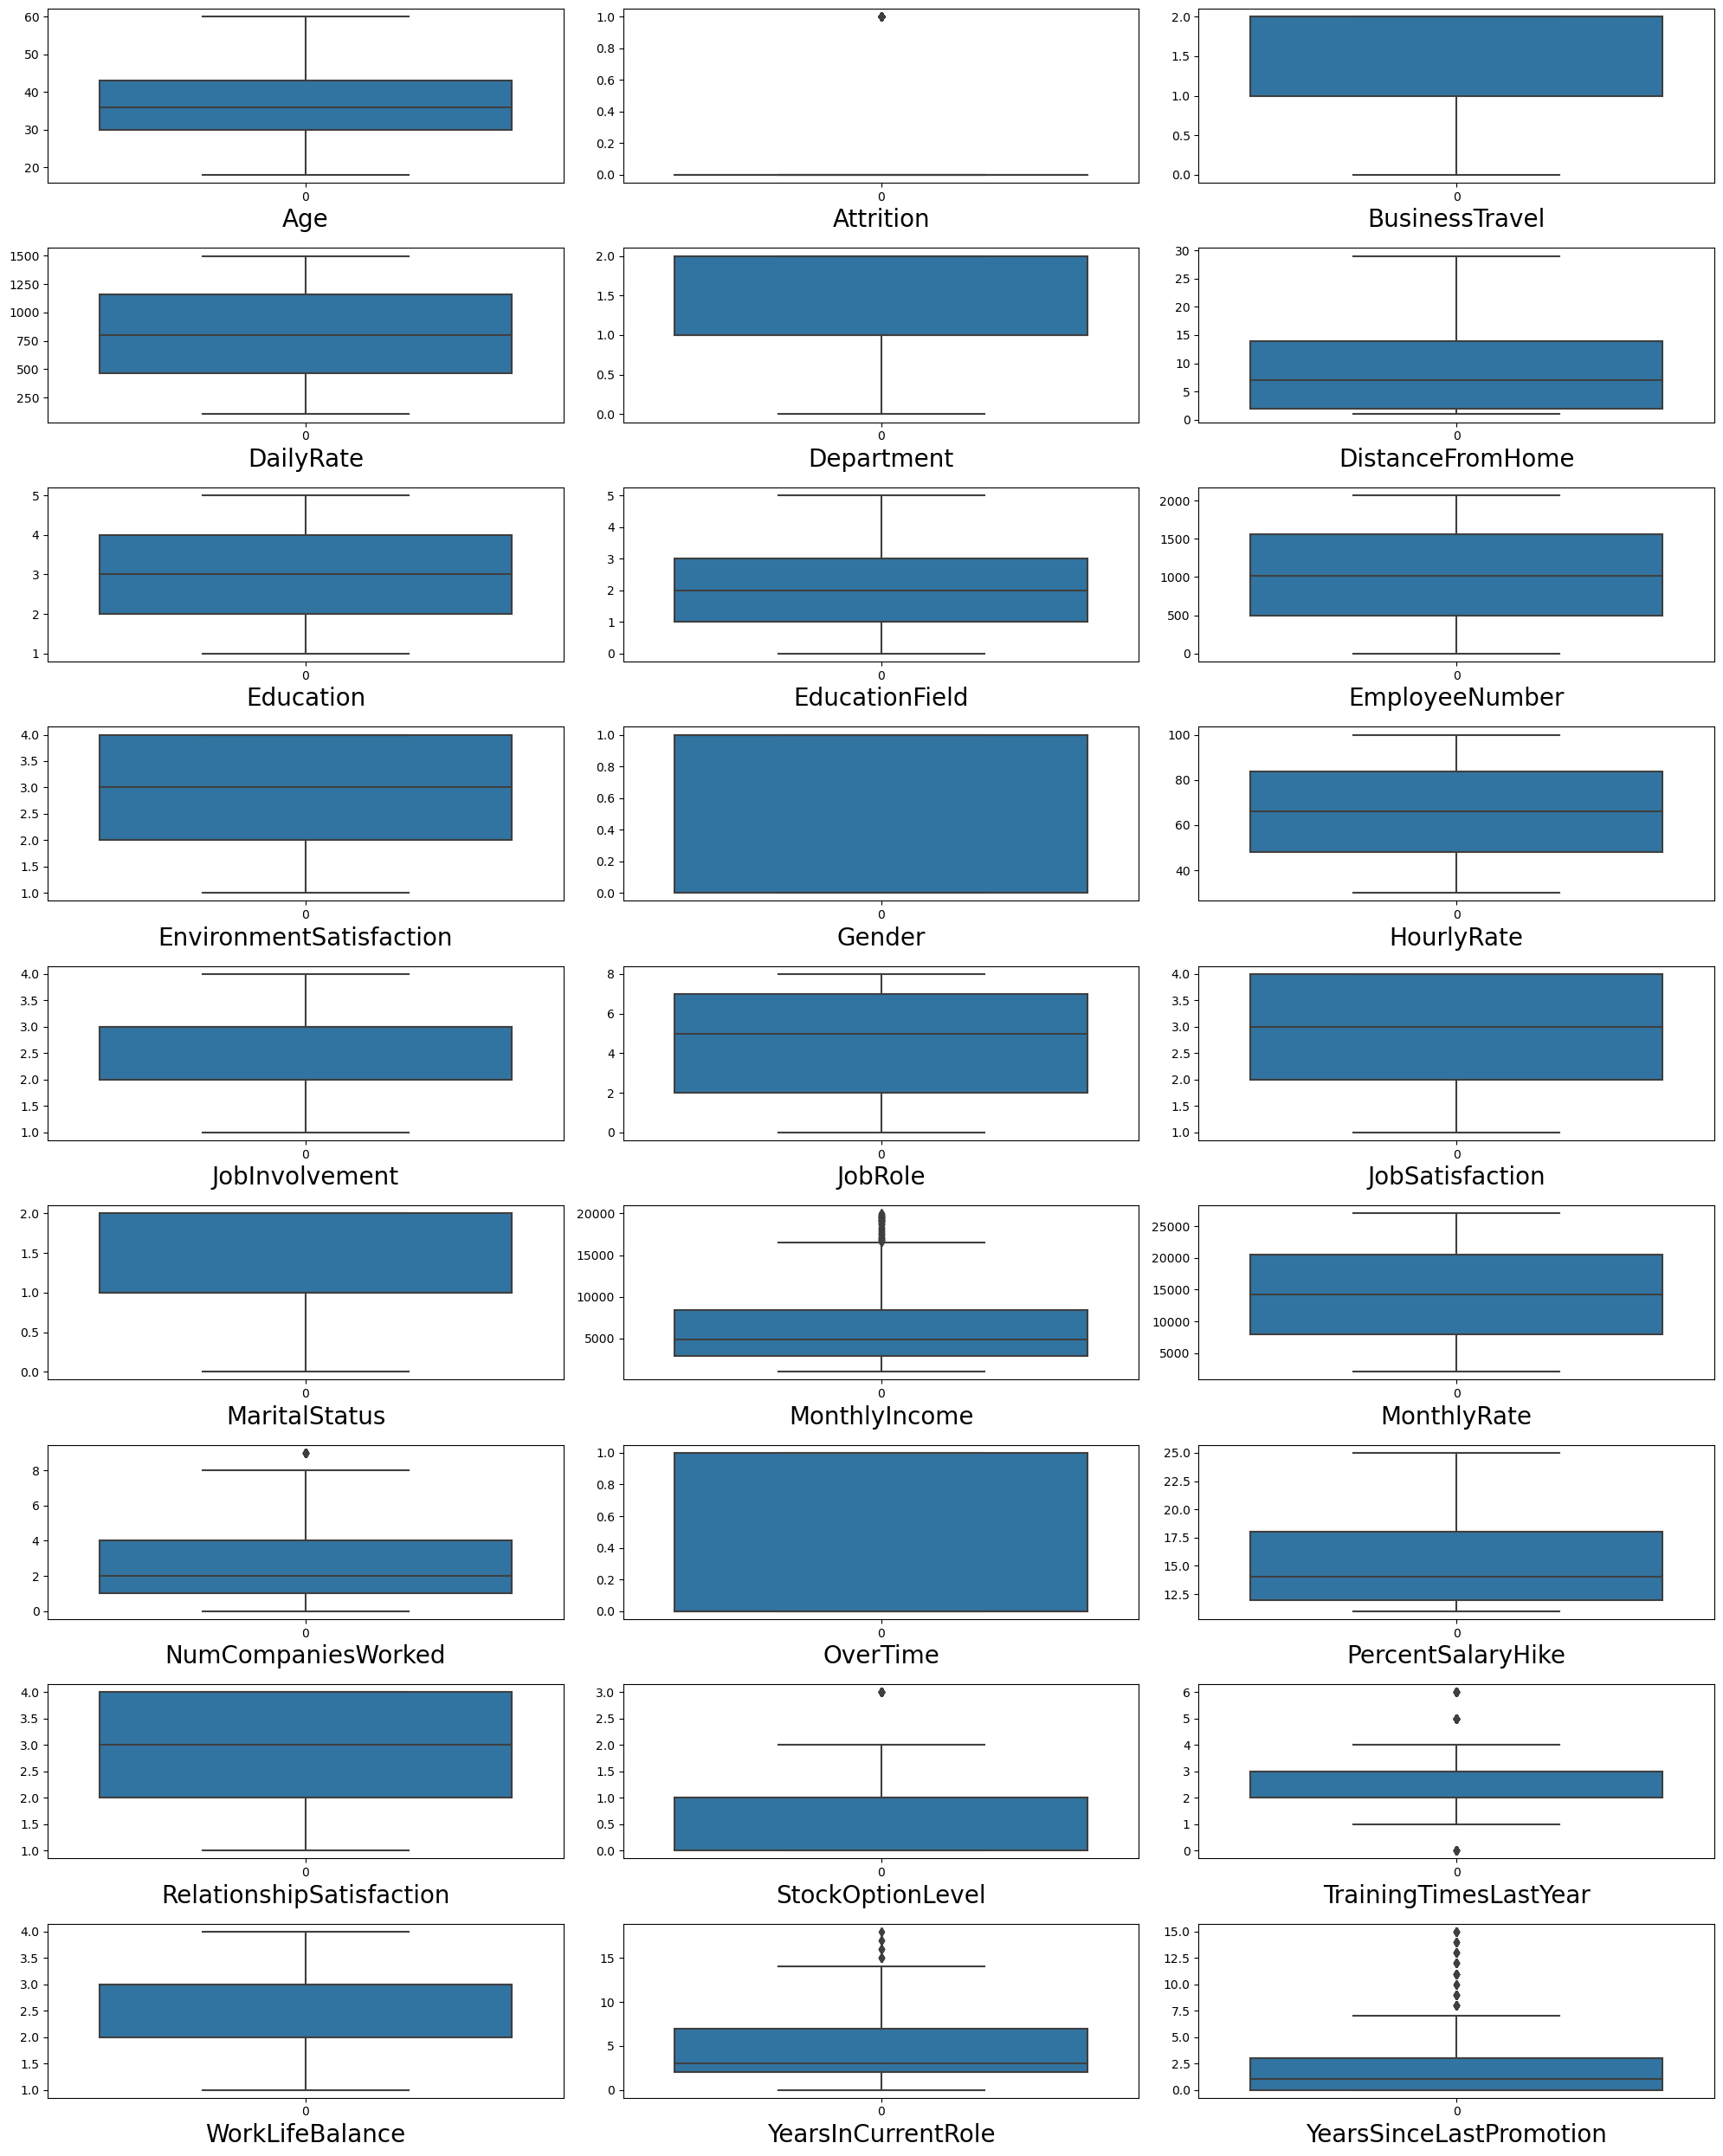

In [72]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data.columns:
    if graph <= 27:
        plt.subplot(9, 3, graph)
        ax = sns.boxplot(data=data[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()


##### There are outliers inside the Monthly Income column, So we will remove it through IQR.

In [73]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

#IQR
iqr = q3 - q1

In [74]:
ml_high = (q3['MonthlyIncome'] + (1.5* iqr['MonthlyIncome']))
print(ml_high)

ml_index= np.where(data['MonthlyIncome']> ml_high) 
print (ml_index)

data = data.drop(data.index[ml_index])
print (data.shape ) 

data.reset_index()

16581.0
(array([  25,   29,   45,   62,  105,  106,  112,  119,  123,  147,  165,
        186,  187,  190,  194,  231,  233,  237,  244,  257,  263,  270,
        279,  280,  290,  314,  326,  329,  379,  392,  400,  411,  417,
        425,  429,  445,  466,  473,  477,  489,  497,  535,  538,  561,
        568,  584,  588,  592,  595,  609,  653,  699,  710,  714,  716,
        741,  746,  749,  755,  766,  770,  774,  799,  804,  810,  814,
        851,  858,  861,  867,  869,  894,  898,  899,  904,  907,  913,
        916,  918,  922,  936,  937,  945,  954,  955,  956,  999, 1008,
       1009, 1024, 1043, 1055, 1080, 1116, 1126, 1129, 1135, 1140, 1154,
       1184, 1185, 1225, 1242, 1264, 1277, 1330, 1331, 1348, 1351, 1374,
       1377, 1401, 1437, 1443], dtype=int64),)
(1356, 27)


,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,0,41,1.0,2.0,1102,2.0,1,2,1.0,1,2,0.0,94,3,7.0,4,2.0,5993,19479,8,1.0,11,1,0,0,1,4,0
1,1,49,0.0,1.0,279,1.0,8,1,1.0,2,3,1.0,61,2,6.0,2,1.0,5130,24907,1,0.0,23,4,1,3,3,7,1
2,2,37,1.0,2.0,1373,1.0,2,2,4.0,4,4,1.0,92,2,2.0,3,2.0,2090,2396,6,1.0,15,2,0,3,3,0,0
3,3,33,0.0,1.0,1392,1.0,3,4,1.0,5,4,0.0,56,3,6.0,3,1.0,2909,23159,1,1.0,11,3,0,3,3,7,3
4,4,27,0.0,2.0,591,1.0,2,1,3.0,7,1,1.0,40,3,2.0,2,1.0,3468,16632,9,0.0,12,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1465,36,0.0,1.0,884,1.0,23,2,3.0,2061,3,1.0,41,4,2.0,4,1.0,2571,12290,4,0.0,17,3,1,3,3,2,0
1352,1466,39,0.0,2.0,613,1.0,6,1,3.0,2062,4,1.0,42,2,0.0,1,1.0,9991,21457,4,0.0,15,1,1,5,3,7,1
1353,1467,27,0.0,2.0,155,1.0,4,3,1.0,2064,2,1.0,87,4,4.0,2,1.0,6142,5174,1,1.0,20,2,1,0,3,2,0
1354,1468,49,0.0,1.0,1023,2.0,2,3,3.0,2065,4,1.0,63,2,7.0,2,1.0,5390,13243,2,0.0,14,4,0,3,2,6,0


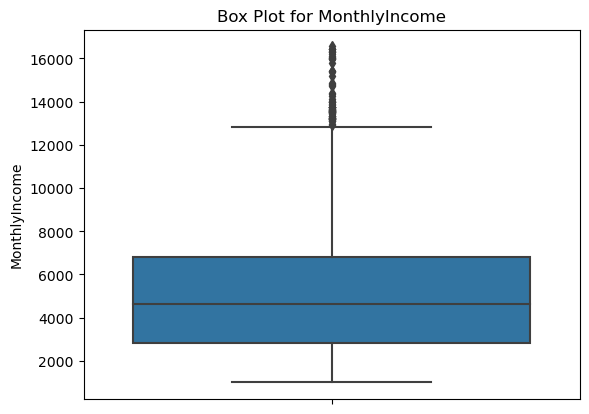

In [75]:
plt.figure()
sns.boxplot(y=data['MonthlyIncome'])
plt.title('Box Plot for MonthlyIncome')
plt.show()

##### It has not removed all the outliers, but it is better than before.

In [76]:
data.skew()

Age                         0.530363
Attrition                   1.748713
BusinessTravel             -1.414309
DailyRate                  -0.002620
Department                  0.177663
DistanceFromHome            0.924153
Education                  -0.294718
EducationField              0.558655
EmployeeNumber              0.011366
EnvironmentSatisfaction    -0.313239
Gender                     -0.400547
HourlyRate                 -0.035856
JobInvolvement             -0.482038
JobRole                    -0.418752
JobSatisfaction            -0.337053
MaritalStatus              -0.167340
MonthlyIncome               1.194390
MonthlyRate                 0.019849
NumCompaniesWorked          1.067176
OverTime                    0.955464
PercentSalaryHike           0.797353
RelationshipSatisfaction   -0.294784
StockOptionLevel            0.964807
TrainingTimesLastYear       0.555034
WorkLifeBalance            -0.566422
YearsInCurrentRole          0.839895
YearsSinceLastPromotion     2.084613
d

In [82]:
corr_data = data.corr()
corr_data['Attrition'].sort_values()

YearsInCurrentRole         -0.172350
Age                        -0.143863
StockOptionLevel           -0.141340
MonthlyIncome              -0.141278
JobInvolvement             -0.129257
JobSatisfaction            -0.109451
EnvironmentSatisfaction    -0.104093
WorkLifeBalance            -0.068175
DailyRate                  -0.060033
TrainingTimesLastYear      -0.054495
RelationshipSatisfaction   -0.050487
Education                  -0.029800
YearsSinceLastPromotion    -0.019765
PercentSalaryHike          -0.014488
EmployeeNumber             -0.010271
HourlyRate                 -0.006940
BusinessTravel             -0.001793
MonthlyRate                 0.008536
EducationField              0.020898
Gender                      0.036925
NumCompaniesWorked          0.054737
Department                  0.056586
JobRole                     0.060102
DistanceFromHome            0.079641
MaritalStatus               0.161571
OverTime                    0.251520
Attrition                   1.000000
N

###### HourlyRate,BusinessTravel and MonthlyRate have exactly zero relation with label, so we will remove them. And we also remove EmployeeNumber, this is not useful for our project.

In [83]:
data = data.drop(columns=['HourlyRate','BusinessTravel','MonthlyRate','EmployeeNumber'])
data.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion
0,41,1.0,1102,2.0,1,2,1.0,2,0.0,3,7.0,4,2.0,5993,8,1.0,11,1,0,0,1,4,0
1,49,0.0,279,1.0,8,1,1.0,3,1.0,2,6.0,2,1.0,5130,1,0.0,23,4,1,3,3,7,1
2,37,1.0,1373,1.0,2,2,4.0,4,1.0,2,2.0,3,2.0,2090,6,1.0,15,2,0,3,3,0,0
3,33,0.0,1392,1.0,3,4,1.0,4,0.0,3,6.0,3,1.0,2909,1,1.0,11,3,0,3,3,7,3
4,27,0.0,591,1.0,2,1,3.0,1,1.0,3,2.0,2,1.0,3468,9,0.0,12,4,1,3,3,2,2


##### The data of all the remaining columns is of categorical type, so we will extract the skewness only from the monthly income column.

In [84]:
data['MonthlyIncome'] = np.cbrt(data['MonthlyIncome'])

In [85]:
data.skew()

Age                         0.530363
Attrition                   1.748713
DailyRate                  -0.002620
Department                  0.177663
DistanceFromHome            0.924153
Education                  -0.294718
EducationField              0.558655
EnvironmentSatisfaction    -0.313239
Gender                     -0.400547
JobInvolvement             -0.482038
JobRole                    -0.418752
JobSatisfaction            -0.337053
MaritalStatus              -0.167340
MonthlyIncome               0.502009
NumCompaniesWorked          1.067176
OverTime                    0.955464
PercentSalaryHike           0.797353
RelationshipSatisfaction   -0.294784
StockOptionLevel            0.964807
TrainingTimesLastYear       0.555034
WorkLifeBalance            -0.566422
YearsInCurrentRole          0.839895
YearsSinceLastPromotion     2.084613
dtype: float64

In [86]:
## Dividing dependent and independent variable
x = data.drop('Attrition',axis = 1)
y = data['Attrition']


In [87]:
## After dividing variable I scaled independent variable to normalizes the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)


### variance_inflation_factor

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
## detect the
vif = pd.DataFrame()   

vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]  

vif["Features"] = x.columns    

vif

,vif,Features
0,1.353914,Age
1,1.021476,DailyRate
2,2.190435,Department
3,1.013325,DistanceFromHome
4,1.066179,Education
5,1.014974,EducationField
6,1.017701,EnvironmentSatisfaction
7,1.019569,Gender
8,1.012350,JobInvolvement
9,2.114116,JobRole


##### There is no multicollinearity in the remaining columns.

In [91]:
y.value_counts()

0.0    1124
1.0     232
Name: Attrition, dtype: int64

##### There is data  imbalance problem then we will resample with the help of this smote.

In [92]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=99)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [93]:
y_resampled.value_counts()

1.0    1124
0.0    1124
Name: Attrition, dtype: int64

##### now class imbalance problem is solved

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size = 0.25, random_state= 99)

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [97]:
# Write a function and call as many as time to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n========================Train Result======================\n")
        print(f"Accuracy Score:  {accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        print("\n========================Test Result==========================")
        print(f"Accuracy Score:  {accuracy_score(y_test, pred) * 100:.2f}%")
        print('\n \n Test Classifiction Report \n', classification_report(y_test, pred,digits=2))

## model building

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### DecisionTreeClassifier


In [100]:
# Training and initiation name to modal
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [103]:
# Call the function and pass dataset to check train and test score
metric_score(dtc,x_train,x_test,y_train,y_test, train=True)        
metric_score(dtc,x_train,x_test,y_train,y_test, train=False)     


========================Train Result======================

Accuracy Score:  100.00%

========================Test Result==========================
Accuracy Score:  82.38%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       272
         1.0       0.81      0.87      0.84       290

    accuracy                           0.82       562
   macro avg       0.83      0.82      0.82       562
weighted avg       0.83      0.82      0.82       562



### RandomForestClassifier

In [104]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [105]:
# Call the function and pass dataset to check train and test score
metric_score(rfc,x_train,x_test,y_train,y_test, train=True)        
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)


========================Train Result======================

Accuracy Score:  100.00%

========================Test Result==========================
Accuracy Score:  91.99%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       272
         1.0       0.95      0.89      0.92       290

    accuracy                           0.92       562
   macro avg       0.92      0.92      0.92       562
weighted avg       0.92      0.92      0.92       562



### KNeighborsClassifier

In [106]:
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [107]:
# Call the function and pass dataset to check train and test score
metric_score(knn,x_train,x_test,y_train,y_test, train=True)        
metric_score(knn,x_train,x_test,y_train,y_test, train=False)


========================Train Result======================

Accuracy Score:  84.16%

========================Test Result==========================
Accuracy Score:  76.51%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.89      0.59      0.71       272
         1.0       0.71      0.93      0.80       290

    accuracy                           0.77       562
   macro avg       0.80      0.76      0.76       562
weighted avg       0.79      0.77      0.76       562



## Cross Validation

##### Cross Validation score to check if the model is overfitting

In [108]:
from sklearn.model_selection import cross_val_score

##### RandomForestClassifier

In [110]:
cross_val_scores = cross_val_score(rfc, x_resampled,y_resampled, cv=8, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)


Mean Cross-Validation Accuracy: 0.9177046263345195


##### Our model is not overfit and its accuracy is also good, so I will build the model from RandomForestClassifier only.

### Hyperparameter tuning:

In [113]:
from sklearn.model_selection import GridSearchCV

In [115]:
param_g = {'criterion': ['gini', 'entropy'],
           'n_estimators': [5,10],
           'max_depth': [None, 5,8],
           'min_samples_split': [2, 5],
           'min_samples_leaf': [1, 2, 4]}

In [116]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_g, cv=5, scoring='accuracy')

In [117]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5], 'n_estimators': [5, 10]},
             scoring='accuracy')

In [118]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [119]:
grid_search.best_score_

0.8997594507752005

In [120]:
rfc_hpt = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_leaf=2,min_samples_split=2,n_estimators=10)
rfc_hpt.fit(x_train,y_train)


RandomForestClassifier(min_samples_leaf=2, n_estimators=10)

In [121]:
# Call the function and pass dataset to check train and test score
metric_score(rfc_hpt,x_train,x_test,y_train,y_test, train=True)       
metric_score(rfc_hpt,x_train,x_test,y_train,y_test, train=False)       


========================Train Result======================

Accuracy Score:  98.22%

========================Test Result==========================
Accuracy Score:  91.28%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       272
         1.0       0.94      0.89      0.91       290

    accuracy                           0.91       562
   macro avg       0.91      0.91      0.91       562
weighted avg       0.91      0.91      0.91       562



#### result is same

In [122]:
import pickle

In [123]:
pickle.dump(rfc_hpt,open('HR','wb'))